# 03. Enumeration

In [1]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt')

In [6]:
sample_data = data[:100]
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11484\1536900195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)


In [3]:
stopwords = [
'의','가','이','은','들',
'는','좀','잘','걍','과',
'도','를','으로','자','에',
'와','한','하다',
'을','때','부터','수'
]

In [4]:
tokenizer = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')
tokenized = []

In [7]:
for sentence in sample_data['document']:
	temp = tokenizer.morphs(sentence)
	temp = [word for word in temp if not word in stopwords]
	tokenized.append(temp)

In [8]:
vocab = FreqDist(np.hstack(tokenized))

In [9]:
vocab_size = 500
vocab = vocab.most_common(vocab_size)

In [10]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}

In [12]:
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [15]:
encoded = []
for line in tokenized:
    temp = []
    for w in line:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['unk'])
    encoded.append(temp)

# 04. Padding

In [18]:
max_len = max(len(l) for l in encoded)

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.420000


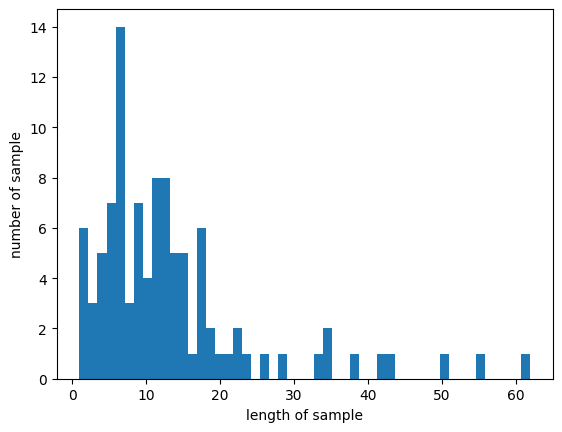

In [20]:
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [21]:
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index['pad']] * (max_len - len(line))

In [22]:
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 62
리뷰의 평균 길이 : 62.000000


In [23]:
print(encoded[:3])

[[74, 8, 4, 47, 38, 75, 14, 25, 26, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [184, 76, 185, 186, 187, 39, 188, 110, 189, 190, 19, 111, 191, 192, 12, 48, 77, 112, 27, 39, 193, 113, 114, 28, 194, 195, 196, 15, 110, 6, 78, 49, 15, 40, 197, 198, 4, 199, 6, 79, 29, 200, 80, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [201, 115, 202, 203, 28, 204, 205, 50, 9, 23, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [ ]:
ㅁ